In [6]:
# All Required Imports
import os
import numpy as np
import scipy.io as io
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [7]:
def show_img(img):
    fig_1 = plt.figure(figsize=(10,10))
    ax_1 = fig_1.add_subplot(111)
    ax_1.imshow(img)
    plt.show()

os.makedirs(f'./results', exist_ok=True)

#Read Images
image_0=cv2.imread('data/Camera00.jpg')
image_0=cv2.cvtColor(image_0,cv2.COLOR_BGR2RGB)
image_1=cv2.imread('data/Camera01.jpg')
image_1=cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

# Load kmatrices and pose data
data = io.loadmat('data/data.mat')

k_0, k_1 = data['K_0'], data['K_1']
r_1, t_1 = data['R_1'], data['t_1']

# Load chessboard corners
corners_cam_0 = np.asarray(data['cornersCam0'], dtype=np.float32)
corners_cam_1 = np.asarray(data['cornersCam1'], dtype=np.float32)

Finding the fundamental matrix $\textbf{F}$.

In [8]:
# The formula for Fundamental Matrix is a matrix multiplication between inverse transpose of k1 with skewed Translation Matrix with Rotation Matrix and inverse of k0 matrix

k1_inverse=np.linalg.inv(k_1)                                                                                       # Getting the inverse of k1 matrix
k1_inverse_transpose=np.transpose(k1_inverse)                                                                       # Getting the transpose of the inverse of k1

k0_inverse=np.linalg.inv(k_0)                                                                                       # Getting the inverse of k0 matrix

translation_matrix=np.array(([0,-t_1[0,2],t_1[0,1]],[t_1[0,2],0,-t_1[0,0]],[-t_1[0,1],t_1[0,0],0])).reshape(3,3)    # Converting the translation matrix into skew translation matrix
Fundamental_matrix=k1_inverse_transpose@translation_matrix@r_1@k0_inverse                                           # Multiplying the matrices to get Fundamental Matrix
display("Fundamental Matrix (F)",Fundamental_matrix)

'Fundamental Matrix (F)'

array([[ 4.32613079e-08, -2.94957444e-07,  3.09417880e-04],
       [-7.85225041e-07, -1.44160167e-07, -7.12492588e-03],
       [-3.02634033e-04,  9.77268861e-03, -4.88854107e-02]])

Calculating & Drawing the epipolar lines on Image 0

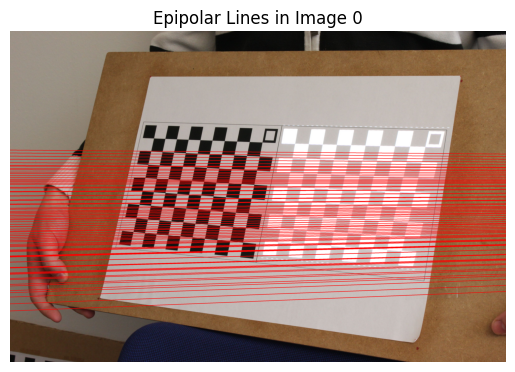

In [9]:
one_dimensional=np.array(1).reshape(1,1)                                                                            # Initialising the value of 1
w,h = image_1.shape[0],image_1.shape[1]                                                                             # Finding the shape of the image

# Finding epipolar lines coordinates
for i in range (len(corners_cam_1)):                                                                               
    coordinates=corners_cam_1[i,:]                                                                                  # Fetching the coordinates from corners_cam_0
    coordinates=coordinates.reshape(2,1)                                                                            
    xyz=np.vstack((coordinates,one_dimensional))                                                                    # Stacking the 1 at the end of the coordinates system
    
    # Appending the matrix having the epipolar lines coordinates
    if i == 0:                                                                                                      # Initialising the epipolar lines matrix
        l=np.matmul(Fundamental_matrix,xyz)                                                                         # Matrix multiplying the Fundamental Matrix and the coordinates to get the epipolar lines' coordiantes                                                                     
    else:
        lprime=np.matmul(Fundamental_matrix,xyz)                                                                    # Matrix multiplying the Fundamental Matrix and the coordinates to get the epipolar lines' coordiantes
        l=np.append(l,lprime,axis=1)                                                                                # Concatenating the epipolar lines' coordinates

l=np.transpose(l)                                                                                                   
i==0                                                                                                                

# Plotting the epipolar lines on the image camera 1 image
# Using the formula y1=(-lx.x1-lz)/ly
for i in range (len(l)):

    # Appending the matrix of y coordinates of epipolar lines
    if i == 0:
        # Since plotting a point requires 2 points hence.........
        y0=[(-l[i,2])/l[i,1]]                                                                                       # For Point 1 considering x1 = 0               
        y1=[-(l[i,0]*h+l[i,2])/l[i,1]]                                                                              # For Point 2 considering x1 = h

    else:
        y_prime_0=[(-l[i,2])/l[i,1]]                                                                                # For Point 1 considering x1 = 0 
        y_prime_1=[-(l[i,0]*h+l[i,2])/l[i,1]]                                                                       # For Point 2 considering x1 = h
        y0=np.append(y0,y_prime_0,axis=0)                                                                           # Appending y values for first point
        y1=np.append(y1,y_prime_1,axis=0)                                                                           # Appending y values for second point

# Plotting the epipolar lines on the image
for i in range (len(corners_cam_1)):
    epipolar_lines=cv2.line(image_0,(0,int(y0[i])),(h,int(y1[i])),(255,0,0),3)                                      # Using opencv library to plot epipolar lines on the image 2

plt.axis('off')
plt.title("Epipolar Lines in Image 0")
plt.imshow(epipolar_lines)
plt.savefig('results/epilines.png')                                                                                  
plt.show()

Calculating & Drawing the epipolar lines on Image 1

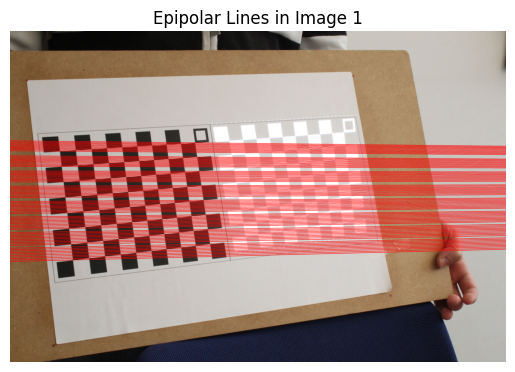

In [10]:
one_dimensional=np.array(1).reshape(1,1)                                                                            # Initialising the value of 1
w,h = image_1.shape[0],image_1.shape[1]                                                                             # Finding the shape of the image

# Finding epipolar lines coordinates
for i in range (len(corners_cam_0)):                                                                               
    coordinates=corners_cam_0[i,:]                                                                                  # Fetching the coordinates from corners_cam_0
    coordinates=coordinates.reshape(2,1)                                                                            
    xyz=np.vstack((coordinates,one_dimensional))                                                                    # Stacking the 1 at the end of the coordinates system
    
    # Appending the matrix having the epipolar lines coordinates
    if i == 0:                                                                                                      # Initialising the epipolar lines matrix
        l=np.matmul(Fundamental_matrix,xyz)                                                                         # Matrix multiplying the Fundamental Matrix and the coordinates to get the epipolar lines' coordiantes                                                                     
    else:
        lprime=np.matmul(Fundamental_matrix,xyz)                                                                    # Matrix multiplying the Fundamental Matrix and the coordinates to get the epipolar lines' coordiantes
        l=np.append(l,lprime,axis=1)                                                                                # Concatenating the epipolar lines' coordinates

l=np.transpose(l)                                                                                                   
i==0                                                                                                                

# Plotting the epipolar lines on the image camera 1 image
# Using the formula y1=(-lx.x1-lz)/ly
for i in range (len(l)):

    # Appending the matrix of y coordinates of epipolar lines
    if i == 0:
        # Since plotting a point requires 2 points hence.........
        y0=[(-l[i,2])/l[i,1]]                                                                                       # For Point 1 considering x1 = 0               
        y1=[-(l[i,0]*h+l[i,2])/l[i,1]]                                                                              # For Point 2 considering x1 = h

    else:
        y_prime_0=[(-l[i,2])/l[i,1]]                                                                                # For Point 1 considering x1 = 0 
        y_prime_1=[-(l[i,0]*h+l[i,2])/l[i,1]]                                                                       # For Point 2 considering x1 = h
        y0=np.append(y0,y_prime_0,axis=0)                                                                           # Appending y values for first point
        y1=np.append(y1,y_prime_1,axis=0)                                                                           # Appending y values for second point

# Plotting the epipolar lines on the image
for i in range (len(corners_cam_1)):
    epipolar_lines=cv2.line(image_1,(0,int(y0[i])),(h,int(y1[i])),(255,0,0),3)                                      # Using opencv library to plot epipolar lines on the image 2

plt.axis('off')
plt.title("Epipolar Lines in Image 1")
plt.imshow(epipolar_lines)
plt.savefig('results/epilines.png')                                                                                  
plt.show()